## Training the chatbot to understand user intents

### The first intent is: Water not hot enough

Training phrases are: 
1. water not hot enough
2. water warm
3. Water not hot


In [1]:
# Now we need to describe those training examples mathematically. We apply some really basic NLP called TFIDF.

#1. We recognize the basic building block for those phrases are "tokens"


training <- c("water not hot enough", "water warm", "Water not hot")




#### normalize the tokens by lower casing 
#####  there are many other normalization such as 
1. Stemming
2. Synonyms
3. etc.

In [2]:
training_norm_intent1 = tolower(training)
training_norm_intent1

[1] "water not hot enough" "water warm"           "water not hot"

#### Tokenization

In [3]:
tokenization = function(training_set){
    result <- list("Charactristic", length(training_set))
    for(i in 1:length(training_set)) {
    result[i] = strsplit(training_set[i], " ")
    }
    return(result)
}

In [4]:
tokenization(training_norm_intent1)

[[1]]
[1] "water"  "not"    "hot"    "enough"

[[2]]
[1] "water" "warm" 

[[3]]
[1] "water" "not"   "hot"

Store the result in a variable for future use

In [5]:
intent1 = tokenization(training_norm_intent1)

#### Form token vector

In [6]:
unlist(intent1)

[1] "water"  "not"    "hot"    "enough" "water"  "warm"   "water"  "not"   
[9] "hot"

#### Find unique tokens

In [7]:
unique_tokens <- unique(unlist(intent1))
unique_tokens

[1] "water"  "not"    "hot"    "enough" "warm"

####  TF is term frequency : counting tokens

In [8]:
sum(unlist(intent1) == "water")

[1] 3

#### Count token for each training phrases

In [9]:
unlist(intent1[1])

[1] "water"  "not"    "hot"    "enough"

In [10]:
water_TF = data.frame(matrix(nrow = length(intent1), ncol = length(unique_tokens), data = NA))
for(i in 1:length(intent1)) {
    for(j in 1:length(unique_tokens)){
        water_TF[i,j] = sum(unique_tokens[j] == unlist(intent1[i])) 
    }
}
colnames(water_TF) = unique_tokens

In [11]:
water_TF

water not hot enough warm
1 1     1   1   1      0   
2 1     0   0   0      1   
3 1     1   1   0      0

### The second intent is: WATERHEATER_SELL

**Training Phrases are:**

1. How much is the lowest priced water heater
2. How much is the water heater

In [12]:
sell_training <- c("How much is the lowest priced water heater", "How much is the water heater")
sell_training

[1] "How much is the lowest priced water heater"
[2] "How much is the water heater"

In [13]:
get_TF = function(training_set){
    training_set = tolower(training_set)
    result <- list("Charactristic", length(training_set))
    for(i in 1:length(training_set)) {
    result[i] = strsplit(training_set[i], " ")
    }
    unique_tokens = unique(unlist(result))
    TF = data.frame(matrix(nrow = length(result), ncol = length(unique_tokens), data = NA))
    for(i in 1:length(result)) {
        for(j in 1:length(unique_tokens)){
            TF[i,j] = sum(unique_tokens[j] == unlist(result[i])) 
            }
    }
    colnames(TF) = unique_tokens
    return(TF)
}

In [14]:
sell_TF = get_TF(sell_training)
sell_TF

how much is the lowest priced water heater
1 1   1    1  1   1      1      1     1     
2 1   1    1  1   0      0      1     1

### The third intent is: WATERHEATER_CHECK

**Training Phrases are:**

1. why is my water heater not functioning
2. can you help me check my water heater

In [15]:
check_training = c('why is my water heater not functioning', 'can you help me check my water heater')

In [16]:
check_TF = get_TF(check_training)
check_TF

why is my water heater not functioning can you help me check
1 1   1  1  1     1      1   1           0   0   0    0  0    
2 0   0  1  1     1      0   0           1   1   1    1  1

### The fourth intent is: WATERHEATER_INSTALL

**Training Phrases are:**

1. how much does it cost to install my water heater
2. Can you help me to install my water heater

In [17]:
install_training = c('how much does it cost to install my water heater', 'Can you help me to install my water heater')

In [18]:
install_TF = get_TF(install_training)
install_TF

how much does it cost to install my water heater can you help me
1 1   1    1    1  1    1  1       1  1     1      0   0   0    0 
2 0   0    0    0  0    1  1       1  1     1      1   1   1    1

### We concatenate all the tables

In [19]:
library('dplyr')
library('factoextra')

TF_1 = bind_rows(water_TF, sell_TF)
TF_2 = bind_rows(TF_1, check_TF)
TF_3 = bind_rows(TF_2, install_TF)
TF_3[is.na(TF_3)] = 0
TF_3


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


water not hot enough warm how much is the lowest ⋯ can you help me check does
1 1     1   1   1      0    0   0    0  0   0      ⋯ 0   0   0    0  0     0   
2 1     0   0   0      1    0   0    0  0   0      ⋯ 0   0   0    0  0     0   
3 1     1   1   0      0    0   0    0  0   0      ⋯ 0   0   0    0  0     0   
4 1     0   0   0      0    1   1    1  1   1      ⋯ 0   0   0    0  0     0   
5 1     0   0   0      0    1   1    1  1   0      ⋯ 0   0   0    0  0     0   
6 1     1   0   0      0    0   0    1  0   0      ⋯ 0   0   0    0  0     0   
7 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1   1    1  1     0   
8 1     0   0   0      0    1   1    0  0   0      ⋯ 0   0   0    0  0     1   
9 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1   1    1  0     0   
  it cost to install
1 0  0    0  0      
2 0  0    0  0      
3 0  0    0  0      
4 0  0    0  0      
5 0  0    0  0      
6 0  0    0  0      
7 0  0    0  0      
8 1  1    1  1      
9 0  0    1  1

In [20]:
TF_3$label = c(rep('Intent_1',3),rep('Intent_2',2),rep('Intent_3',2),rep('Intent_4',2))
TF_3

water not hot enough warm how much is the lowest ⋯ you help me check does it
1 1     1   1   1      0    0   0    0  0   0      ⋯ 0   0    0  0     0    0 
2 1     0   0   0      1    0   0    0  0   0      ⋯ 0   0    0  0     0    0 
3 1     1   1   0      0    0   0    0  0   0      ⋯ 0   0    0  0     0    0 
4 1     0   0   0      0    1   1    1  1   1      ⋯ 0   0    0  0     0    0 
5 1     0   0   0      0    1   1    1  1   0      ⋯ 0   0    0  0     0    0 
6 1     1   0   0      0    0   0    1  0   0      ⋯ 0   0    0  0     0    0 
7 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1    1  1     0    0 
8 1     0   0   0      0    1   1    0  0   0      ⋯ 0   0    0  0     1    1 
9 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1    1  0     0    0 
  cost to install label   
1 0    0  0       Intent_1
2 0    0  0       Intent_1
3 0    0  0       Intent_1
4 0    0  0       Intent_2
5 0    0  0       Intent_2
6 0    0  0       Intent_3
7 0    0  0       Intent_3
8 1    1  1       Intent_4
9 0    1  1       Intent_4

In [23]:
rownames(TF_3) = c('TF1','TF2','TF3','TF4','TF5','TF6','TF7','TF8','TF9')

In [25]:
TF_4 = TF_3[,-ncol(TF_3)]

In [26]:
TF_4

water not hot enough warm how much is the lowest ⋯ can you help me check
TF1 1     1   1   1      0    0   0    0  0   0      ⋯ 0   0   0    0  0    
TF2 1     0   0   0      1    0   0    0  0   0      ⋯ 0   0   0    0  0    
TF3 1     1   1   0      0    0   0    0  0   0      ⋯ 0   0   0    0  0    
TF4 1     0   0   0      0    1   1    1  1   1      ⋯ 0   0   0    0  0    
TF5 1     0   0   0      0    1   1    1  1   0      ⋯ 0   0   0    0  0    
TF6 1     1   0   0      0    0   0    1  0   0      ⋯ 0   0   0    0  0    
TF7 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1   1    1  1    
TF8 1     0   0   0      0    1   1    0  0   0      ⋯ 0   0   0    0  0    
TF9 1     0   0   0      0    0   0    0  0   0      ⋯ 1   1   1    1  0    
    does it cost to install
TF1 0    0  0    0  0      
TF2 0    0  0    0  0      
TF3 0    0  0    0  0      
TF4 0    0  0    0  0      
TF5 0    0  0    0  0      
TF6 0    0  0    0  0      
TF7 0    0  0    0  0      
TF8 1    1  1    1  1      
TF9 0    0  0    1  1

In [37]:
pca_tf4 = prcomp(TF_4, center = T)

In [38]:
summary(pca_tf4)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.1548 1.0750 0.8148 0.7030 0.48989 0.38336 0.32395
Proportion of Variance 0.3179 0.2755 0.1583 0.1178 0.05722 0.03504 0.02502
Cumulative Proportion  0.3179 0.5934 0.7517 0.8695 0.92675 0.96178 0.98680
                          PC8       PC9
Standard deviation     0.2353 8.839e-17
Proportion of Variance 0.0132 0.000e+00
Cumulative Proportion  1.0000 1.000e+00

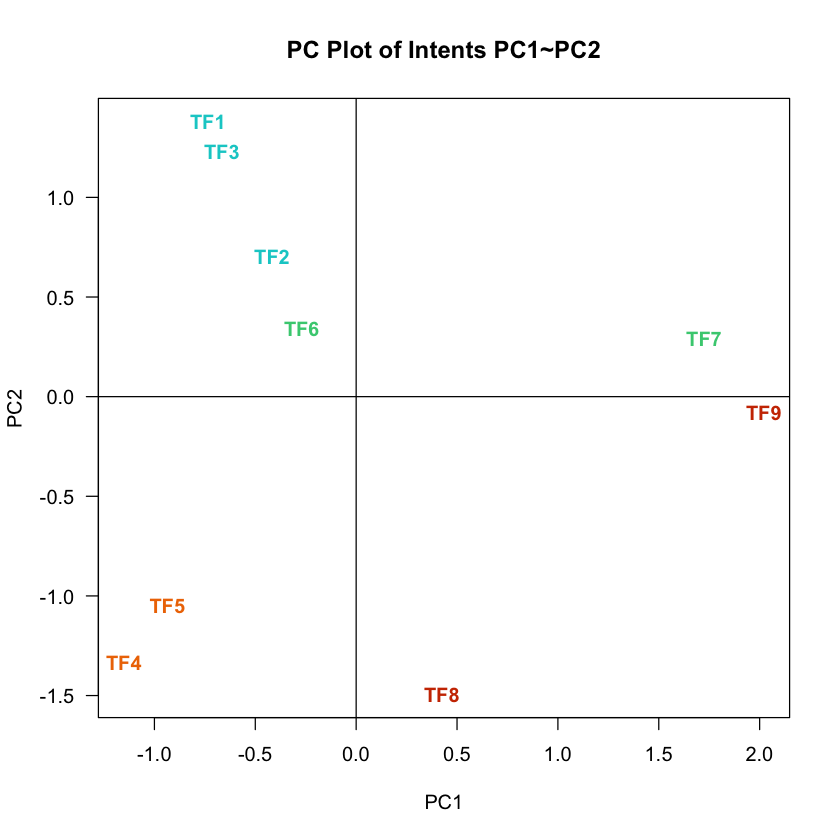

In [39]:
font = rep(c(2,2,2,2),c(3,2,2,2))
color = rep(c('cyan3','darkorange2', 'seagreen3','orangered3'),c(3,2,2,2))

#Plot
plot(pca_tf4$x[,1:2], type = "n", las = 1,main = "PC Plot of Intents PC1~PC2", xlab = 'PC1', ylab = 'PC2')
abline(h = 0, v = 0)
text(pca_tf4$x[,1],pca_tf4$x[,2], labels = rownames(TF_4), col=color, font = font )
#legend(-5, -1, legend=c("Intent_1", "Intent_2","Intent_3","Intent_4"),col=c('cyan3','darkorange2', 'seagreen4','orangered3'), fill=c('cyan3','darkorange2', 'seagreen3','orangered3'),cex = 0.7)

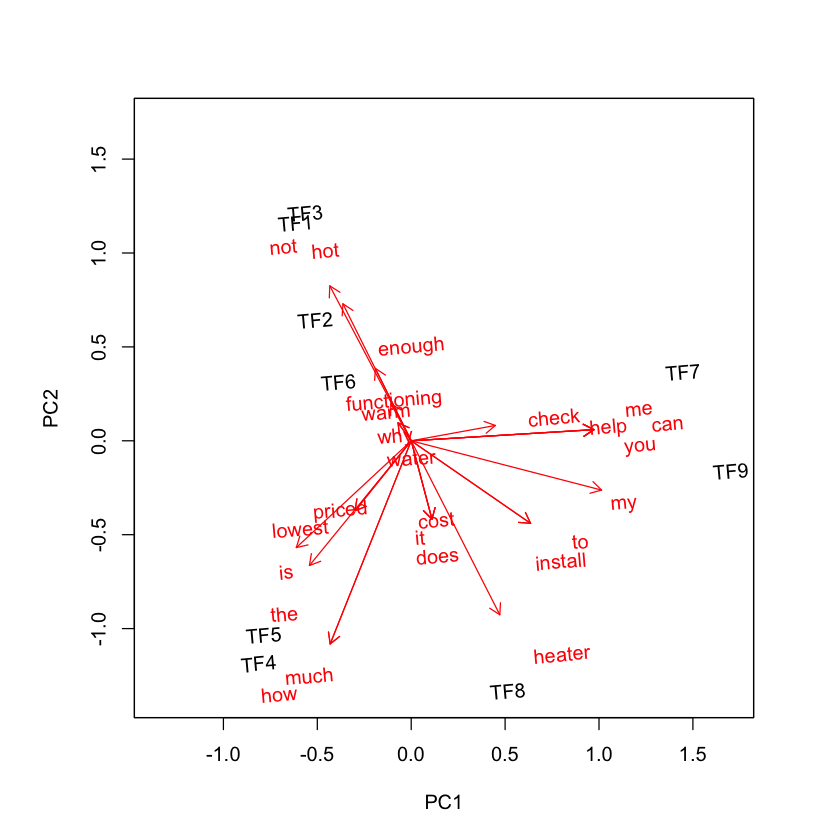

In [106]:
options(warn=-1)
biplot(pca_tf4, srt = 5, pos = 1:4, xaxt='n', yaxt='n')
axis(1)
axis(2)

#### Normalization

In [40]:
TF_5 = mapply("/", as.data.frame(TF_4), colSums(TF_4))
TF_5

water     not       hot enough warm how       much      is        the
 [1,] 0.1111111 0.3333333 0.5 1      0    0.0000000 0.0000000 0.0000000 0.0
 [2,] 0.1111111 0.0000000 0.0 0      1    0.0000000 0.0000000 0.0000000 0.0
 [3,] 0.1111111 0.3333333 0.5 0      0    0.0000000 0.0000000 0.0000000 0.0
 [4,] 0.1111111 0.0000000 0.0 0      0    0.3333333 0.3333333 0.3333333 0.5
 [5,] 0.1111111 0.0000000 0.0 0      0    0.3333333 0.3333333 0.3333333 0.5
 [6,] 0.1111111 0.3333333 0.0 0      0    0.0000000 0.0000000 0.3333333 0.0
 [7,] 0.1111111 0.0000000 0.0 0      0    0.0000000 0.0000000 0.0000000 0.0
 [8,] 0.1111111 0.0000000 0.0 0      0    0.3333333 0.3333333 0.0000000 0.0
 [9,] 0.1111111 0.0000000 0.0 0      0    0.0000000 0.0000000 0.0000000 0.0
      lowest ⋯ can you help me  check does it cost to  install
 [1,] 0      ⋯ 0.0 0.0 0.0  0.0 0     0    0  0    0.0 0.0    
 [2,] 0      ⋯ 0.0 0.0 0.0  0.0 0     0    0  0    0.0 0.0    
 [3,] 0      ⋯ 0.0 0.0 0.0  0.0 0     0    0  0    0.0 0.0    
 [4,] 1      ⋯ 0.0 0.0 0.0  0.0 0     0    0  0    0.0 0.0    
 [5,] 0      ⋯ 0.0 0.0 0.0  0.0 0     0    0  0    0.0 0.0    
 [6,] 0      ⋯ 0.0 0.0 0.0  0.0 0     0    0  0    0.0 0.0    
 [7,] 0      ⋯ 0.5 0.5 0.5  0.5 1     0    0  0    0.0 0.0    
 [8,] 0      ⋯ 0.0 0.0 0.0  0.0 0     1    1  1    0.5 0.5    
 [9,] 0      ⋯ 0.5 0.5 0.5  0.5 0     0    0  0    0.5 0.5

In [41]:
rownames(TF_5) = c('TF1','TF2','TF3','TF4','TF5','TF6','TF7','TF8','TF9')

In [42]:
pca_tf5 = prcomp(TF_5, center = T)

In [43]:
summary(pca_tf5)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     0.6565 0.5938 0.5401 0.4797 0.38113 0.28922 0.25339
Proportion of Variance 0.2635 0.2156 0.1784 0.1407 0.08882 0.05115 0.03926
Cumulative Proportion  0.2635 0.4791 0.6575 0.7982 0.88697 0.93812 0.97737
                           PC8       PC9
Standard deviation     0.19236 2.963e-16
Proportion of Variance 0.02263 0.000e+00
Cumulative Proportion  1.00000 1.000e+00

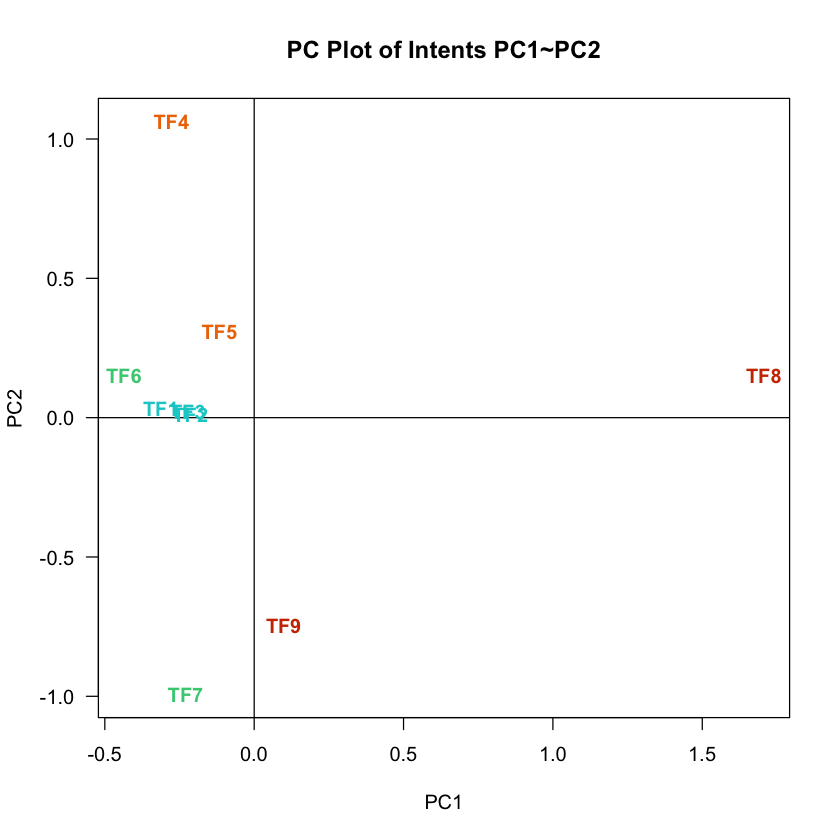

In [44]:
font = rep(c(2,2,2,2),c(3,2,2,2))
color = rep(c('cyan3','darkorange2', 'seagreen3','orangered3'),c(3,2,2,2))

#Plot
plot(pca_tf5$x[,1:2], type = "n", las = 1,main = "PC Plot of Intents PC1~PC2", xlab = 'PC1', ylab = 'PC2')
abline(h = 0, v = 0)
text(pca_tf5$x[,1],pca_tf5$x[,2], labels = rownames(TF_5), col=color, font = font )
#legend(-5, -1, legend=c("Intent_1", "Intent_2","Intent_3","Intent_4"),col=c('cyan3','darkorange2', 'seagreen4','orangered3'), fill=c('cyan3','darkorange2', 'seagreen3','orangered3'),cex = 0.7)

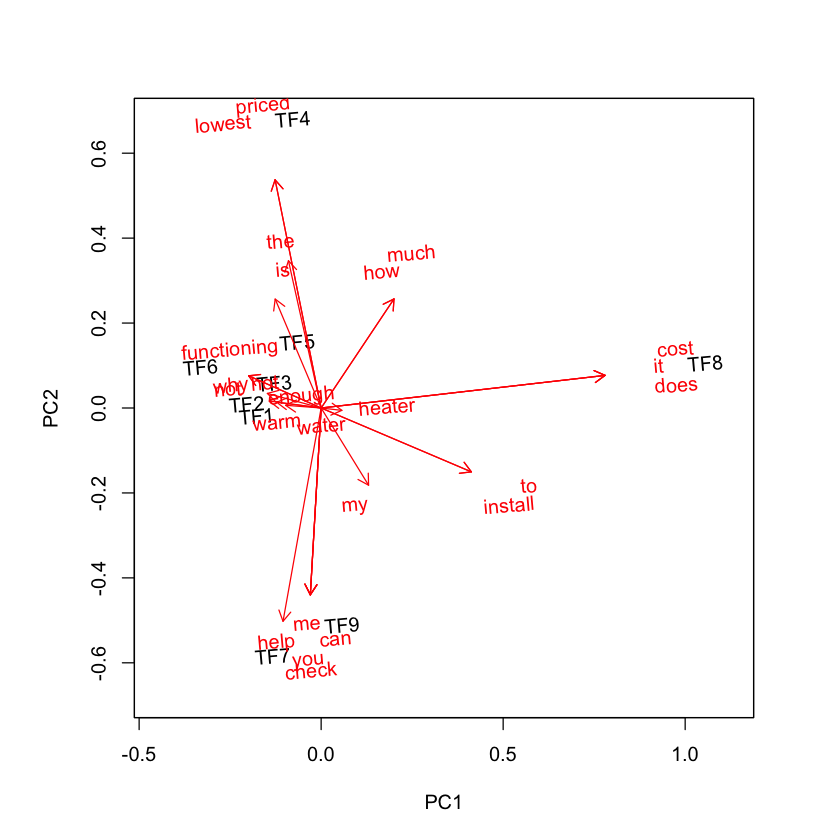

In [105]:
options(warn=-1)
biplot(pca_tf5, srt = 5, pos = 1:4, xaxt='n', yaxt='n', xlim = c(-0.4,1), ylim = c(-0.6,0.6))
axis(1)
axis(2)